In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import warnings

# Exploratory Data Analysis

In [75]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('car.csv')

In [76]:
df.head()

,Unnamed: 0,Manuf,Model,Desc,Engine_Capacity,Fuel_Type,Powertrain,Euro_Standard,Diesel_VED_Supplement,Fuel_Cost,Electric_Cost,Total_Cost,Noise_Level
0,0,ABARTH,595,595 1.4 145 BHP Convertible,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,"£1,935",£0,"£1,935",73.5
1,1,ABARTH,595,595 1.4 145 BHP Convertible,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,"£2,043",£0,"£2,043",73.5
2,2,ABARTH,595,595 1.4 145 BHP Hatchback,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,"£1,935",£0,"£1,935",73.5
3,3,ABARTH,595,595 1.4 145 BHP Hatchback,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,"£2,043",£0,"£2,043",73.5
4,4,ABARTH,595,595 1.4 TJET 145bhp,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d,False,"£1,828",£0,"£1,828",74.0


In [4]:
# there are a mix of categorical and numeric columns
# label column is Total_Cost
# columns Unnamed,Desc,Diesel_VED_Supplement may be removed

In [77]:
df.shape

(4625, 13)

In [78]:
# there are 4625 observations and 13 features

In [79]:
df.dtypes

Unnamed: 0                 int64
Manuf                     object
Model                     object
Desc                      object
Engine_Capacity            int64
Fuel_Type                 object
Powertrain                object
Euro_Standard             object
Diesel_VED_Supplement       bool
Fuel_Cost                 object
Electric_Cost             object
Total_Cost                object
Noise_Level              float64
dtype: object

In [8]:
# columns Electric_Cost,Total_Cost,Fuel_Cost has to be converted to float
# some columns require encoding as they are categorical

In [9]:
# Converting columns Electric_Cost,Total_Cost,Fuel_Cost  to float in eda itself as it is important for eda of these columns

In [80]:
df['Electric_Cost'] = pd.to_numeric(df['Electric_Cost'].astype(str).str.replace('£', '').str.replace(',', ''), errors='coerce')
df['Total_Cost'] = pd.to_numeric(df['Total_Cost'].astype(str).str.replace('£', '').str.replace(',', ''), errors='coerce')
df['Fuel_Cost'] = pd.to_numeric(df['Fuel_Cost'].astype(str).str.replace('£', '').str.replace(',', ''), errors='coerce')

In [81]:
df.head()

,Unnamed: 0,Manuf,Model,Desc,Engine_Capacity,Fuel_Type,Powertrain,Euro_Standard,Diesel_VED_Supplement,Fuel_Cost,Electric_Cost,Total_Cost,Noise_Level
0,0,ABARTH,595,595 1.4 145 BHP Convertible,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,1935,0,1935,73.5
1,1,ABARTH,595,595 1.4 145 BHP Convertible,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,2043,0,2043,73.5
2,2,ABARTH,595,595 1.4 145 BHP Hatchback,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,1935,0,1935,73.5
3,3,ABARTH,595,595 1.4 145 BHP Hatchback,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,2043,0,2043,73.5
4,4,ABARTH,595,595 1.4 TJET 145bhp,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d,False,1828,0,1828,74.0


In [82]:
df.dtypes

Unnamed: 0                 int64
Manuf                     object
Model                     object
Desc                      object
Engine_Capacity            int64
Fuel_Type                 object
Powertrain                object
Euro_Standard             object
Diesel_VED_Supplement       bool
Fuel_Cost                  int64
Electric_Cost              int64
Total_Cost                 int64
Noise_Level              float64
dtype: object

In [83]:
print(df.columns)

Index(['Unnamed: 0', 'Manuf', 'Model', 'Desc', 'Engine_Capacity', 'Fuel_Type',
       'Powertrain', 'Euro_Standard', 'Diesel_VED_Supplement', 'Fuel_Cost',
       'Electric_Cost', 'Total_Cost', 'Noise_Level'],
      dtype='object')


In [15]:
# Step 2: Summary statistics of numeric columns

In [84]:
df.head()

,Unnamed: 0,Manuf,Model,Desc,Engine_Capacity,Fuel_Type,Powertrain,Euro_Standard,Diesel_VED_Supplement,Fuel_Cost,Electric_Cost,Total_Cost,Noise_Level
0,0,ABARTH,595,595 1.4 145 BHP Convertible,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,1935,0,1935,73.5
1,1,ABARTH,595,595 1.4 145 BHP Convertible,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,2043,0,2043,73.5
2,2,ABARTH,595,595 1.4 145 BHP Hatchback,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,1935,0,1935,73.5
3,3,ABARTH,595,595 1.4 145 BHP Hatchback,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d-TEMP,False,2043,0,2043,73.5
4,4,ABARTH,595,595 1.4 TJET 145bhp,1368,Petrol,Internal Combustion Engine (ICE),Euro 6d,False,1828,0,1828,74.0


In [85]:
df.describe()

,Unnamed: 0,Engine_Capacity,Fuel_Cost,Electric_Cost,Total_Cost,Noise_Level
count,4625.000000,4625.000000,4625.000000,4625.000000,4625.000000,4625.000000
mean,2312.000000,1706.910270,1721.316541,67.032649,1788.346595,65.141492
std,1335.266827,916.609954,711.430744,233.811409,598.873474,15.319174
min,0.000000,0.000000,0.000000,0.000000,586.000000,0.000000
25%,1156.000000,1199.000000,1424.000000,0.000000,1424.000000,67.000000
50%,2312.000000,1499.000000,1666.000000,0.000000,1680.000000,68.000000
75%,3468.000000,1997.000000,1989.000000,0.000000,1999.000000,69.000000
max,4624.000000,6749.000000,4488.000000,1748.000000,4488.000000,89.200000


In [17]:

# columns Engine_Capacity,Fuel_Cost,Electric_Cost,Total_Cost may have outliers

In [86]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0               0.0
Manuf                    0.0
Model                    0.0
Desc                     0.0
Engine_Capacity          0.0
Fuel_Type                0.0
Powertrain               0.0
Euro_Standard            0.0
Diesel_VED_Supplement    0.0
Fuel_Cost                0.0
Electric_Cost            0.0
Total_Cost               0.0
Noise_Level              0.0
dtype: float64

In [19]:
# There are no null missing values

In [20]:
# Step 3: Value counts of category columns

In [87]:
df.select_dtypes(include='object').columns

Index(['Manuf', 'Model', 'Desc', 'Fuel_Type', 'Powertrain', 'Euro_Standard'], dtype='object')

In [88]:
df.select_dtypes(include='object').describe()

,Manuf,Model,Desc,Fuel_Type,Powertrain,Euro_Standard
count,4625,4625,4625,4625,4625,4625
unique,41,324,2218,8,6,4
top,RENAULT,Captur,2.0 EcoBlue,Petrol,Internal Combustion Engine (ICE),Euro 6d
freq,934,210,81,2308,3344,2945


In [89]:

df.Manuf.value_counts()

RENAULT                 934
DACIA                   410
TOYOTA                  354
FORD                    322
HONDA                   294
MERCEDES-BENZ           292
LAND ROVER              289
MAZDA                   217
SEAT                    187
PEUGEOT                 142
KIA                     136
FIAT                    111
JAGUAR                  105
LEXUS                   105
CITROEN                  98
HYUNDAI                  94
CHRYSLER JEEP            62
VOLVO                    53
NISSAN                   50
GENESIS                  44
ABARTH                   42
ALPINE                   34
SUZUKI                   32
MASERATI                 31
MG MOTORS UK             25
ALFA ROMEO               25
Rolls Royce              21
SSANGYONG                19
FERRARI                  16
ASTON MARTIN LAGONDA     13
TESLA                    12
McLaren                  11
SUBARU                    9
BENTLEY MOTORS            9
LOTUS                     9
SMART               

In [90]:
df.Manuf.value_counts()*100/len(df)

RENAULT                 20.194595
DACIA                    8.864865
TOYOTA                   7.654054
FORD                     6.962162
HONDA                    6.356757
MERCEDES-BENZ            6.313514
LAND ROVER               6.248649
MAZDA                    4.691892
SEAT                     4.043243
PEUGEOT                  3.070270
KIA                      2.940541
FIAT                     2.400000
JAGUAR                   2.270270
LEXUS                    2.270270
CITROEN                  2.118919
HYUNDAI                  2.032432
CHRYSLER JEEP            1.340541
VOLVO                    1.145946
NISSAN                   1.081081
GENESIS                  0.951351
ABARTH                   0.908108
ALPINE                   0.735135
SUZUKI                   0.691892
MASERATI                 0.670270
MG MOTORS UK             0.540541
ALFA ROMEO               0.540541
Rolls Royce              0.454054
SSANGYONG                0.410811
FERRARI                  0.345946
ASTON MARTIN L

In [25]:
# There are lot of unique values, all the Manuf with rows less than 1% may be removed

In [91]:
df.Model.value_counts()

Captur                                            210
Duster                                            208
Clio                                              202
Kadjar                                            112
Mégane Hatch                                       82
Defender, 20MY                                     80
CR-V 2021                                          79
Mazda CX-5                                         79
Civic 2021                                         73
Sandero Stepway                                    66
Logan MCV                                          66
CR-V Hybrid 2022                                   65
Trafic Passenger                                   62
Sandero                                            62
Range Rover Sport, 20MY                            58
Mégane Sport Tourer                                52
New Zoe                                            50
500                                                48
Arkana                      

In [27]:
df.Model.value_counts()*100/len(df)

Captur                4.540541
Duster                4.497297
Clio                  4.367568
Kadjar                2.421622
Mégane Hatch          1.772973
                        ...   
Swift Sport           0.021622
Flying Spur MY22.5    0.021622
Highlander            0.021622
540C                  0.021622
Soul EV MY22          0.021622
Name: Model, Length: 324, dtype: float64

In [28]:
# column Model to be dropped 

In [29]:
pd.set_option('display.max_rows', None)

In [92]:
df.Fuel_Type.value_counts()

Petrol                  2308
Diesel                  1066
Petrol Electric          748
Electricity              239
Electricity / Petrol     122
Diesel Electric           70
Petrol / LPG              62
Electricity / Diesel      10
Name: Fuel_Type, dtype: int64

In [93]:
df.Powertrain.value_counts()

Internal Combustion Engine (ICE)          3344
Hybrid Electric Vehicle (HEV)              557
Mild Hybrid Electric Vehicle (MHEV)        341
Battery Electric Vehicle (BEV)             239
Plug-in Hybrid Electric Vehicle (PHEV)     132
Micro-hybrid                                12
Name: Powertrain, dtype: int64

In [94]:
df.Euro_Standard.value_counts()

Euro 6d                        2945
Euro 6d-TEMP                   1299
Euro 6-WLTP (for BEVs only)     239
Euro 6c                         142
Name: Euro_Standard, dtype: int64

In [95]:
df.columns

Index(['Unnamed: 0', 'Manuf', 'Model', 'Desc', 'Engine_Capacity', 'Fuel_Type',
       'Powertrain', 'Euro_Standard', 'Diesel_VED_Supplement', 'Fuel_Cost',
       'Electric_Cost', 'Total_Cost', 'Noise_Level'],
      dtype='object')

In [34]:
# Step 4: Data Visualization

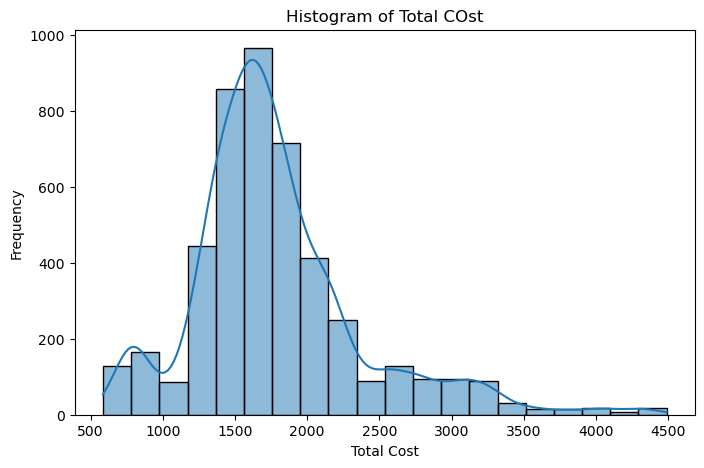

In [96]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Cost'], bins=20, kde=True)
plt.title('Histogram of Total COst')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

In [36]:
# there may be lot of upper end outliers in Total Cost and it forms a uniform distribution

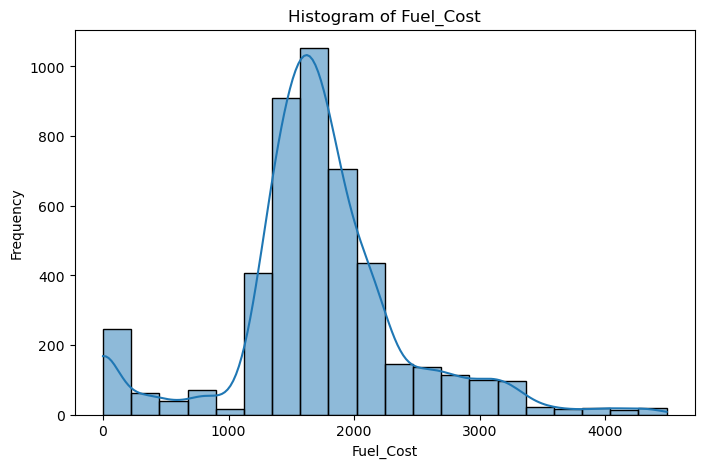

In [97]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Fuel_Cost'], bins=20, kde=True)
plt.title('Histogram of Fuel_Cost')
plt.xlabel('Fuel_Cost')
plt.ylabel('Frequency')
plt.show()

In [38]:
# there may be  outliers in Fuel Cost

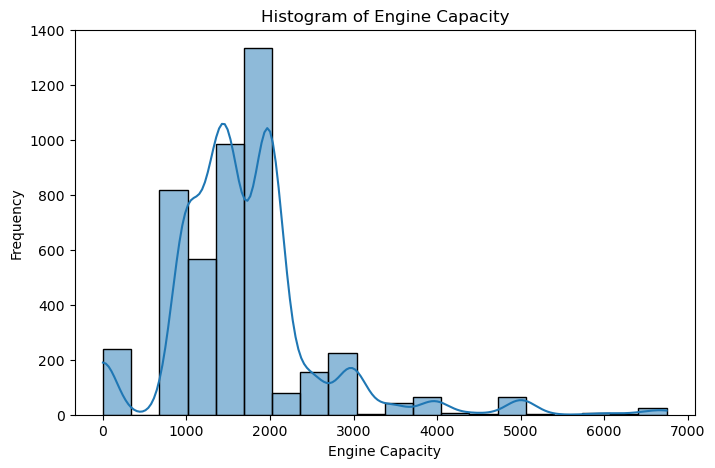

In [98]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Engine_Capacity'], bins=20, kde=True)
plt.title('Histogram of Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Frequency')
plt.show()

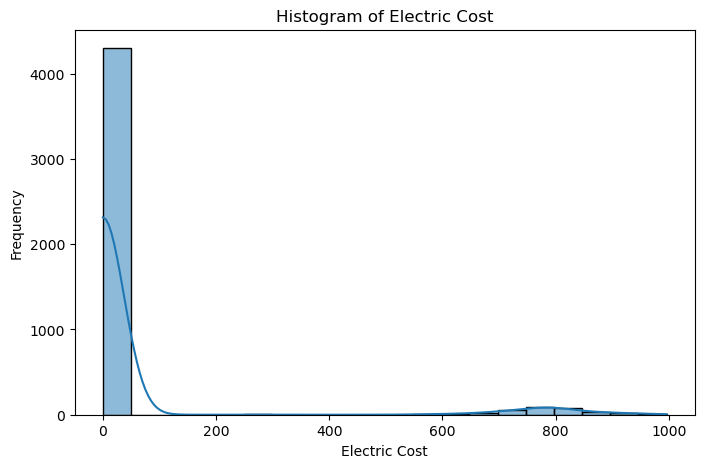

In [40]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Electric_Cost'], bins=20, kde=True)
plt.title('Histogram of Electric Cost')
plt.xlabel('Electric Cost')
plt.ylabel('Frequency')
plt.show()

In [41]:
# there may be outliers in upper end

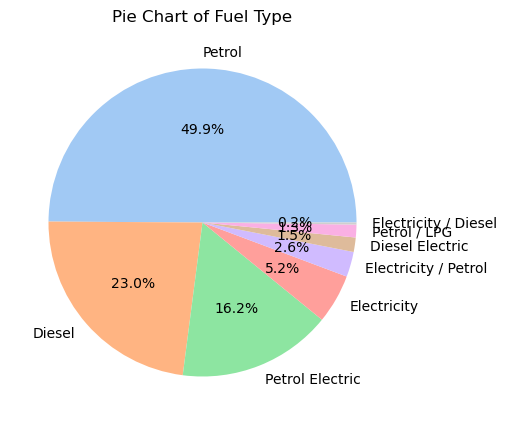

In [100]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fuel Type')
plt.ylabel('')
plt.show()

In [44]:
# sub categories are not equally distributed

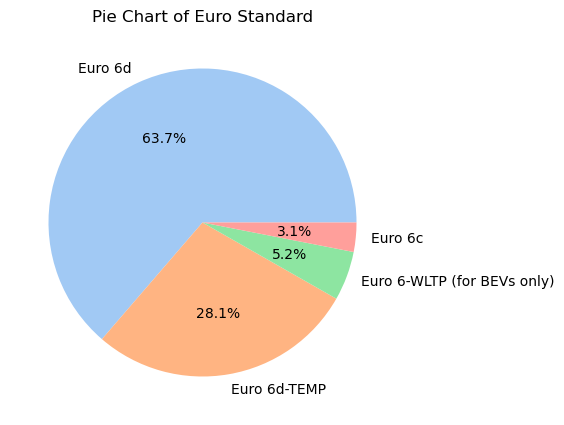

In [101]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Euro_Standard'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Euro Standard')
plt.ylabel('')
plt.show()

In [46]:
# Euro standards is not equally distributed

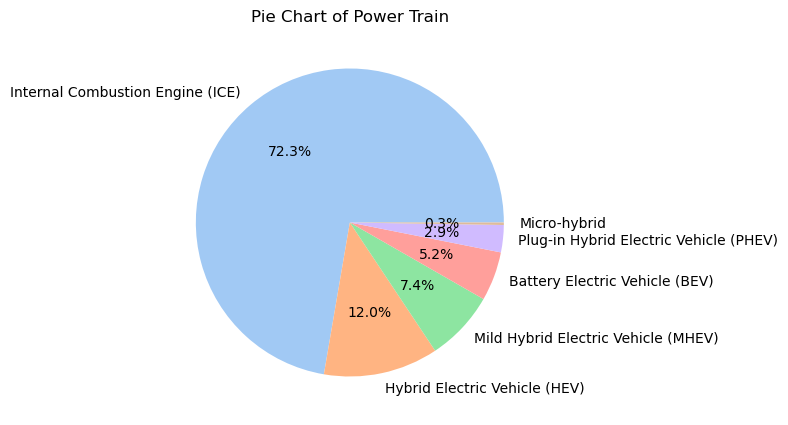

In [102]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Powertrain'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Power Train')
plt.ylabel('')
plt.show()

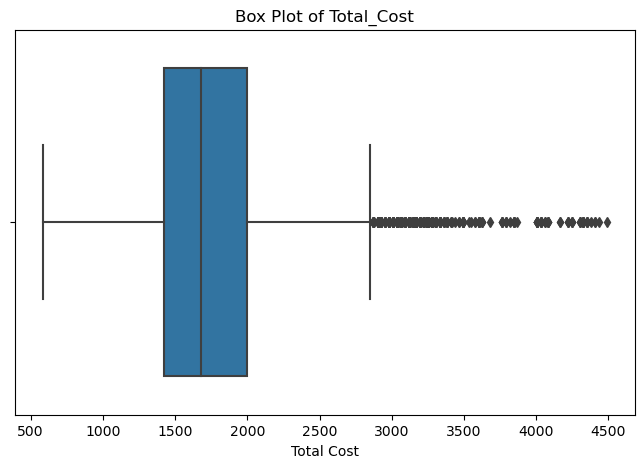

In [103]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total_Cost'])
plt.title('Box Plot of Total_Cost')
plt.xlabel('Total Cost')
plt.show()

In [50]:
# there are outliers in total cost column

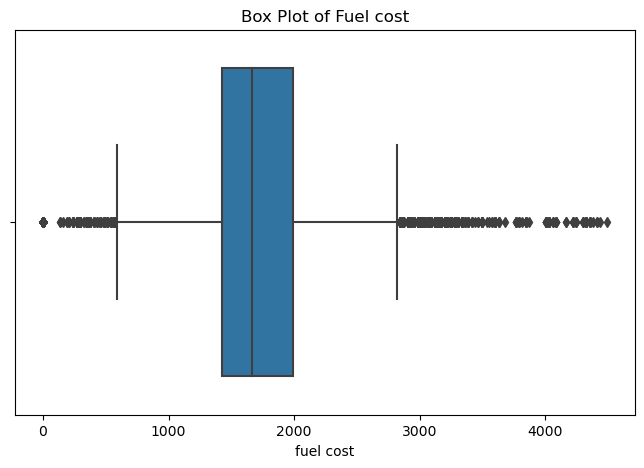

In [104]:

# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fuel_Cost'])
plt.title('Box Plot of Fuel cost')
plt.xlabel('fuel cost')
plt.show()

<Axes: xlabel='Fuel_Cost', ylabel='Total_Cost'>

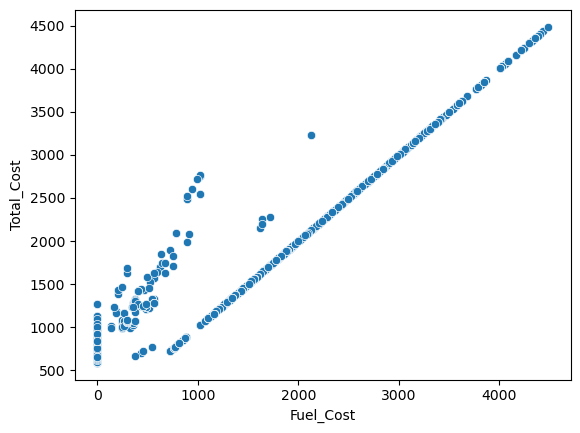

In [105]:
sns.scatterplot(x=df.Fuel_Cost, y=df.Total_Cost)

In [ ]:
# total cost seems to be incrasing with fuel cost

<Axes: xlabel='Engine_Capacity', ylabel='Total_Cost'>

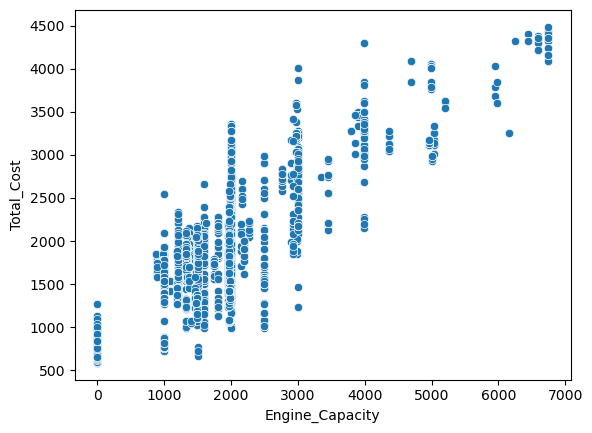

In [106]:
sns.scatterplot(x=df.Engine_Capacity, y=df.Total_Cost)

In [ ]:
# Step 5: Observations from data visualization
# - The Unnamed,Desc,Diesel_VED_Supplement,model columns has to be removed
# - Outliers require rows to be trimmed
# - all the Manuf with rows less than 1% may be removed



# Data Preprocessing

In [107]:
# Step 1: Remove columns - Unnamed,Desc,Diesel_VED_Supplement
df = df.drop(columns=['Unnamed: 0', 'Diesel_VED_Supplement','Desc','Model'])

In [108]:
df.shape

(4625, 9)

In [109]:
# Step 2: remove less frequent manufacturers from the dataframe
common_manufacturers = df['Manuf'].value_counts() * 100 / len(df) > 1
df = df[df['Manuf'].isin(common_manufacturers[common_manufacturers].index)]

In [110]:
df.shape

(4255, 9)

In [111]:
df.Manuf.value_counts()

RENAULT          934
DACIA            410
TOYOTA           354
FORD             322
HONDA            294
MERCEDES-BENZ    292
LAND ROVER       289
MAZDA            217
SEAT             187
PEUGEOT          142
KIA              136
FIAT             111
JAGUAR           105
LEXUS            105
CITROEN           98
HYUNDAI           94
CHRYSLER JEEP     62
VOLVO             53
NISSAN            50
Name: Manuf, dtype: int64

In [112]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()

,Engine_Capacity,Fuel_Cost,Electric_Cost,Total_Cost,Noise_Level
128,1332,1801,0,1801,70.0
129,1332,1935,0,1935,70.0
130,1469,1532,0,1532,68.0
131,1469,1639,0,1639,68.0
132,1332,1801,0,1801,70.0


In [113]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [114]:
df = outlier_remover(df_num,df)

In [115]:
df.shape

(3140, 9)

<Axes: xlabel='Total_Cost'>

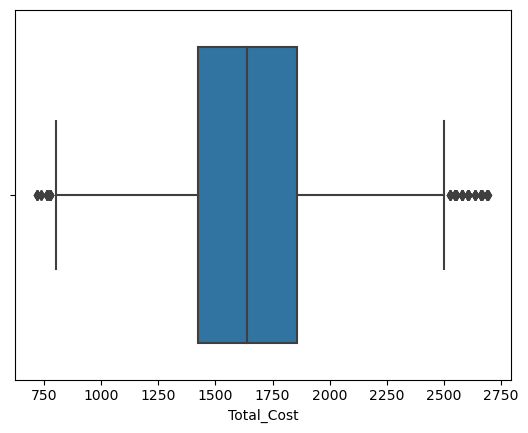

In [116]:
sns.boxplot(x=df['Total_Cost'])

In [117]:
df_num = df.select_dtypes(include='number')
df = outlier_remover(df_num,df)

<Axes: xlabel='Total_Cost'>

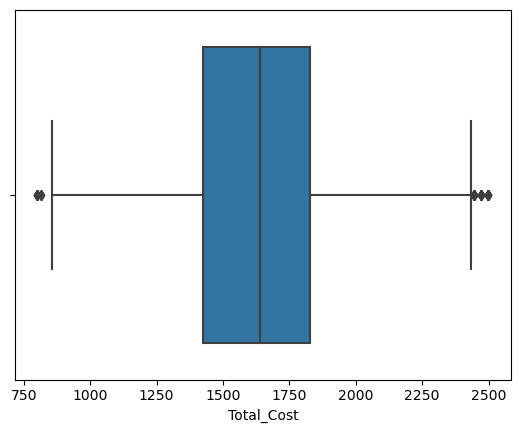

In [118]:
sns.boxplot(x=df['Total_Cost'])

In [119]:
df.shape

(3010, 9)

In [120]:
X = df.drop('Total_Cost', axis=1)
y = df.Total_Cost
X.head()

,Manuf,Engine_Capacity,Fuel_Type,Powertrain,Euro_Standard,Fuel_Cost,Electric_Cost,Noise_Level
128,CHRYSLER JEEP,1332,Petrol,Internal Combustion Engine (ICE),Euro 6d,1801,0,70.0
129,CHRYSLER JEEP,1332,Petrol,Internal Combustion Engine (ICE),Euro 6d,1935,0,70.0
130,CHRYSLER JEEP,1469,Petrol Electric,Mild Hybrid Electric Vehicle (MHEV),Euro 6d,1532,0,68.0
131,CHRYSLER JEEP,1469,Petrol Electric,Mild Hybrid Electric Vehicle (MHEV),Euro 6d,1639,0,68.0
132,CHRYSLER JEEP,1332,Petrol,Internal Combustion Engine (ICE),Euro 6d,1801,0,70.0


In [121]:
X_num = X.select_dtypes('number')
X_num.head()

,Engine_Capacity,Fuel_Cost,Electric_Cost,Noise_Level
128,1332,1801,0,70.0
129,1332,1935,0,70.0
130,1469,1532,0,68.0
131,1469,1639,0,68.0
132,1332,1801,0,70.0


In [122]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Manuf,Fuel_Type,Powertrain,Euro_Standard
128,CHRYSLER JEEP,Petrol,Internal Combustion Engine (ICE),Euro 6d
129,CHRYSLER JEEP,Petrol,Internal Combustion Engine (ICE),Euro 6d
130,CHRYSLER JEEP,Petrol Electric,Mild Hybrid Electric Vehicle (MHEV),Euro 6d
131,CHRYSLER JEEP,Petrol Electric,Mild Hybrid Electric Vehicle (MHEV),Euro 6d
132,CHRYSLER JEEP,Petrol,Internal Combustion Engine (ICE),Euro 6d


In [123]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [124]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [125]:
X_num_scaled.describe()

,Engine_Capacity,Fuel_Cost,Electric_Cost,Noise_Level
count,3010.000000,3010.000000,3010.0,3010.000000
mean,0.336304,0.507202,0.0,0.506831
std,0.210869,0.174366,0.0,0.191917
min,0.000000,0.000000,0.0,0.000000
25%,0.221951,0.366902,0.0,0.375000
50%,0.303902,0.493522,0.0,0.500000
75%,0.545366,0.604829,0.0,0.625000
max,1.000000,1.000000,0.0,1.000000


In [126]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [127]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [128]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((3010, 33), (3010, 4), (3010, 29))

In [129]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Engine_Capacity                                   0
Fuel_Cost                                         0
Electric_Cost                                     0
Noise_Level                                       0
Manuf_CHRYSLER JEEP                               0
Manuf_CITROEN                                     0
Manuf_DACIA                                       0
Manuf_FIAT                                        0
Manuf_FORD                                        0
Manuf_HONDA                                       0
Manuf_HYUNDAI                                     0
Manuf_JAGUAR                                      0
Manuf_KIA                                         0
Manuf_LAND ROVER                                  0
Manuf_LEXUS                                       0
Manuf_MAZDA                                       0
Manuf_MERCEDES-BENZ                               0
Manuf_PEUGEOT                                     0
Manuf_RENAULT 

In [130]:
X.describe()

,Engine_Capacity,Fuel_Cost,Electric_Cost,Noise_Level,Manuf_CHRYSLER JEEP,Manuf_CITROEN,Manuf_DACIA,Manuf_FIAT,Manuf_FORD,Manuf_HONDA,...,Fuel_Type_Petrol,Fuel_Type_Petrol / LPG,Fuel_Type_Petrol Electric,Powertrain_Hybrid Electric Vehicle (HEV),Powertrain_Internal Combustion Engine (ICE),Powertrain_Micro-hybrid,Powertrain_Mild Hybrid Electric Vehicle (MHEV),Euro_Standard_Euro 6c,Euro_Standard_Euro 6d,Euro_Standard_Euro 6d-TEMP
count,3010.000000,3010.000000,3010.0,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,...,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000
mean,0.336304,0.507202,0.0,0.506831,0.009967,0.030565,0.116944,0.032558,0.082392,0.097674,...,0.515282,0.012625,0.197010,0.157807,0.757143,0.003987,0.081063,0.022591,0.666113,0.311296
std,0.210869,0.174366,0.0,0.191917,0.099351,0.172164,0.321406,0.177507,0.275007,0.296923,...,0.499849,0.111666,0.397806,0.364621,0.428881,0.063025,0.272977,0.148621,0.471678,0.463100
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221951,0.366902,0.0,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.303902,0.493522,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.545366,0.604829,0.0,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2408, 33)
(602, 33)
(2408,)
(602,)


In [ ]:
# Step 9: Observations after preprocessing
# -  Unnamed,Desc,Diesel_VED_Supplement columns have been removed.
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

# KNN Regression

In [ ]:
# Train the model with different K values and calculate MAPE scores using CV

In [133]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [134]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    print("best k with holdout test is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))
    return best_k,train_mape_scores,test_mape_scores

In [135]:
def cross_validation(X,y):
    cv_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        #print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores

In [136]:
# user defined function for Cross Validation 
def custom_cross_validation(X,y,no_of_fold):
    warnings.filterwarnings('ignore', category=UserWarning)
    fold_size=len(X)//no_of_fold
    cv_mape_scores = []
    for k in k_list: 
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = []
        for i in range(no_of_fold):
            start = i * fold_size
            end = (i + 1) * fold_size
            X_test_fold = X[start:end]
            y_test_fold = y[start:end]

            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])

            # Fit the model on the training data
            knn.fit(X_train_fold, y_train_fold)

            # Make predictions and calculate a custom score on the test data
            predictions = knn.predict(X_test_fold)
            custom_score = find_mape(predictions,y_test_fold)
            scores.append(custom_score)
        cv_mape_scores.append(np.mean(scores))
    
    # Calculate and return the average score
    best_k_CV = k_list[np.argmin(cv_mape_scores)]
    print("best k with Custom cross validation is {0} and minimum test score is {1}".format(best_k_CV,np.min(cv_mape_scores)))
    return best_k_CV,cv_mape_scores    
        
    

In [137]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)
print("Starting test with Hold Out Data")
print("------------------------------------------")
best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)
print("\n")
print("Starting test Cross-Validation")
print("------------------------------------------")
best_k_CV,cv_mape_scores= cross_validation(X,y)
print("\n")
print("Starting test with Custom Cross-Validation")
print("------------------------------------------")
best_k_CV_custom,cv_mape_scores_custom = custom_cross_validation( X, y, 5)


Starting test with Hold Out Data
------------------------------------------
best k with holdout test is 1 and minimum test score is 0.006549177479718273


Starting test Cross-Validation
------------------------------------------
best k with cross validation is 1 and minimum test score is 0.048755182742010184


Starting test with Custom Cross-Validation
------------------------------------------
best k with Custom cross validation is 1 and minimum test score is 0.047211479562315764


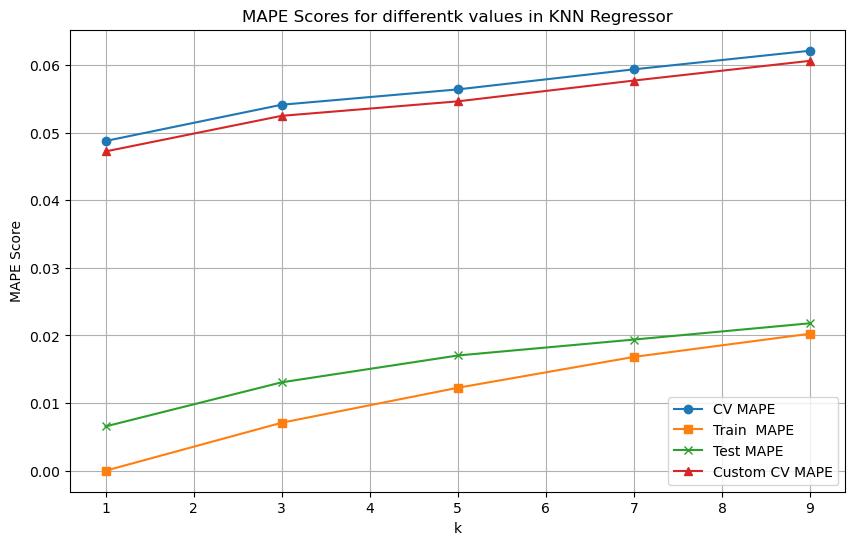

In [138]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores_custom,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()



### CUSTOM IMPLEMENTATION OF KNN

In [ ]:
# function to compute euclidean distance
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [ ]:
#custom function to implement KNN
def knn(X_train,X_test,y_train,k):
    mape_list = []
    y_pred_list = []
    
    for idx, test_row in X_test.iterrows():        
        distances = []
        for index,row in X_train.iterrows():
            distance = euclidean_distance(test_row,row)
            distances.append([distance,y_train[index]])
        distances.sort(key=lambda x: x[0])
        neighbors=distances[:k]
        target_values = np.take(np.array(neighbors),1,axis=1) #select only corresponding y_train values from nested list
        pred_val=np.mean(target_values)
        y_pred_list.append(pred_val)
    #mape = find_mape(y_test,y_pred_list)
    #mape_list.append(mape)
    
    return y_pred_list

In [ ]:
#calling custom functions for KNN
test_mape_scores=[]
train_mape_scores=[]
for k in k_list:
    y_pred_test =knn(X_train,X_test,y_train,k)
    y_pred_train =knn(X_train,X_train,y_train,k)
    test_mape = find_mape(y_test,y_pred_test)
    test_mape_scores.append(test_mape)
    train_mape = find_mape(y_train,y_pred_train)
    train_mape_scores.append(train_mape)


In [ ]:
best_k = k_list[np.argmin(test_mape_scores)]
print("best k with Custom KNN implementation is {0} and minimum test score is {1}".format(best_k,np.min(test_mape_scores)))

In [ ]:
#plot with custom KNN function
plt.figure(figsize=(10, 6))
#plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_list, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_list, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Inference:
# - best k with holdout test is 1 
# - best k with cross validation is 1 
